# Titanic - проект машинного обучения

Гибель "Титаника" - одно из самых печально известных кораблекрушений в истории. 15 апреля 1912 года во время своего первого рейса "Титаник" затонул после столкновения с айсбергом, в результате чего погибли 1502 из 2224 пассажиров и членов экипажа.  На строительство Титаника ушло около 7,5 миллионов долларов.

Датасет (набор данных) "Титаник" - это очень хороший набор данных для начинающих.

Цель этого блокнота - дать представление о том, как происходит рабочий процесс в любой задаче прогностического моделирования.

Задача проста - используя машинное обучение, создать модель, которая предскажет, какие пассажиры выжили после кораблекрушения "Титаника".

### Часть 1: Exploratory Data Analysis(EDA):

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


In [6]:
data = pd.read_csv('train.csv')

In [7]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Описание переменных (названия столбцов).

**survival**	- выжившие:	0 = No, 1 = Yes<br>
**pclass**	- класс билета	1 = 1st, 2 = 2nd, 3 = 3rd<br>
**sex**	- пол	<br>
**Age**	- возраст в годах	<br>
**sibsp**	- количество родственников/супруги на борту "Титаника"<br>
**parch**	- количество родителей / детей	<br>
**ticket**	- номер билета<br>
**fare**	- стоимость проезда	<br>
**cabin**	- номер каюты<br>
**embarked**	- порт посадки	C = Cherbourg, Q = Queenstown, S = Southampton<br>

### Примечания 
**pclass**: Показатель социально-экономического статуса (SES)<br>
1st = высокий
2nd = средний
3rd = низкий
**age**: Возраст является дробным, если меньше 1. Если возраст оценочный, то он имеет вид xx.5<br>
**sibsp**: В датасете семейные отношения определяются таким образом...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)<br>
parch: В датасете семейные отношения определяются таким образом...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Некоторые дети путешествовали только с няней, поэтому для них parch=0.

## Проверка всех отсутствующих данных

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Сколько выжило?

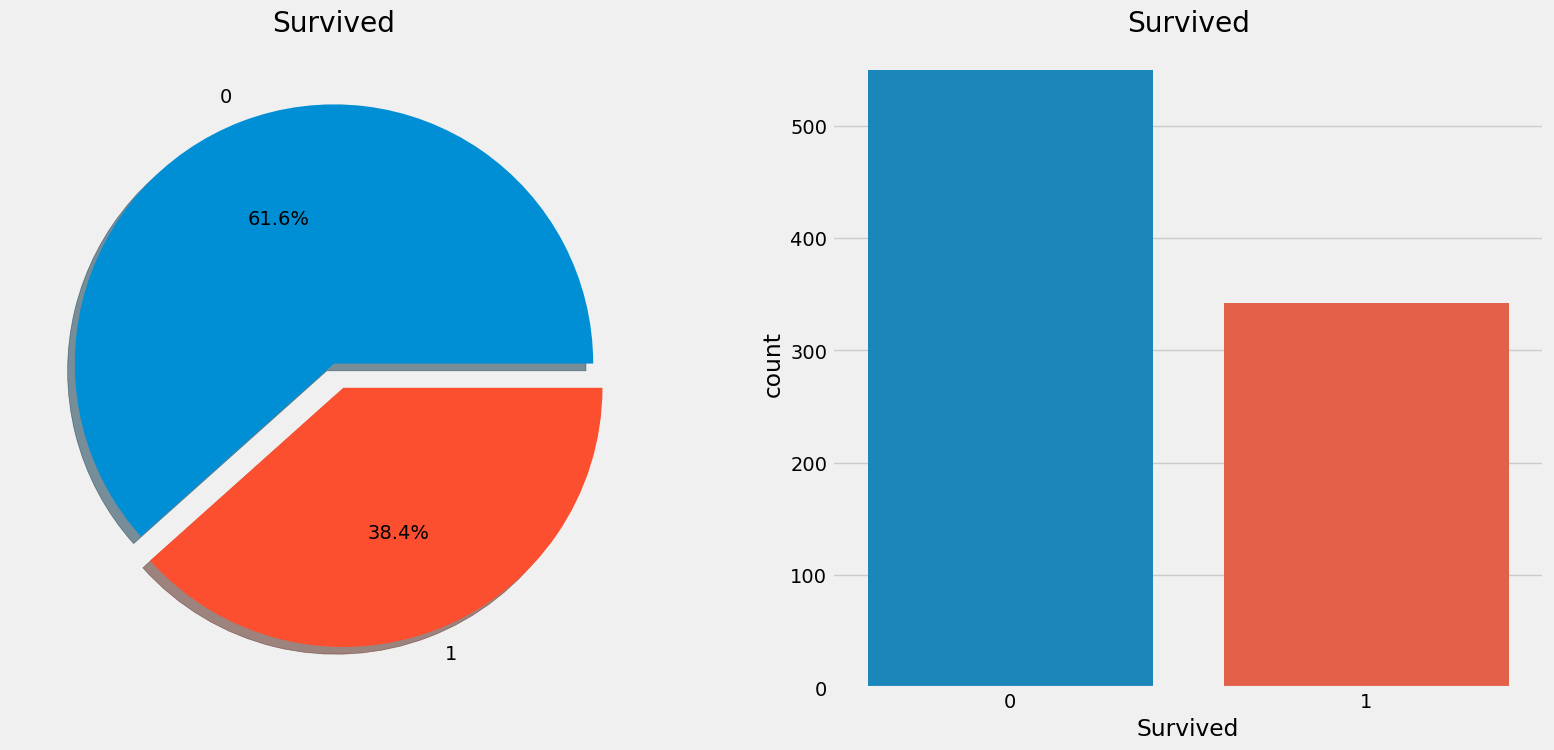

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
#sns.countplot(data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# Анализ признаков

# Пол

In [10]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

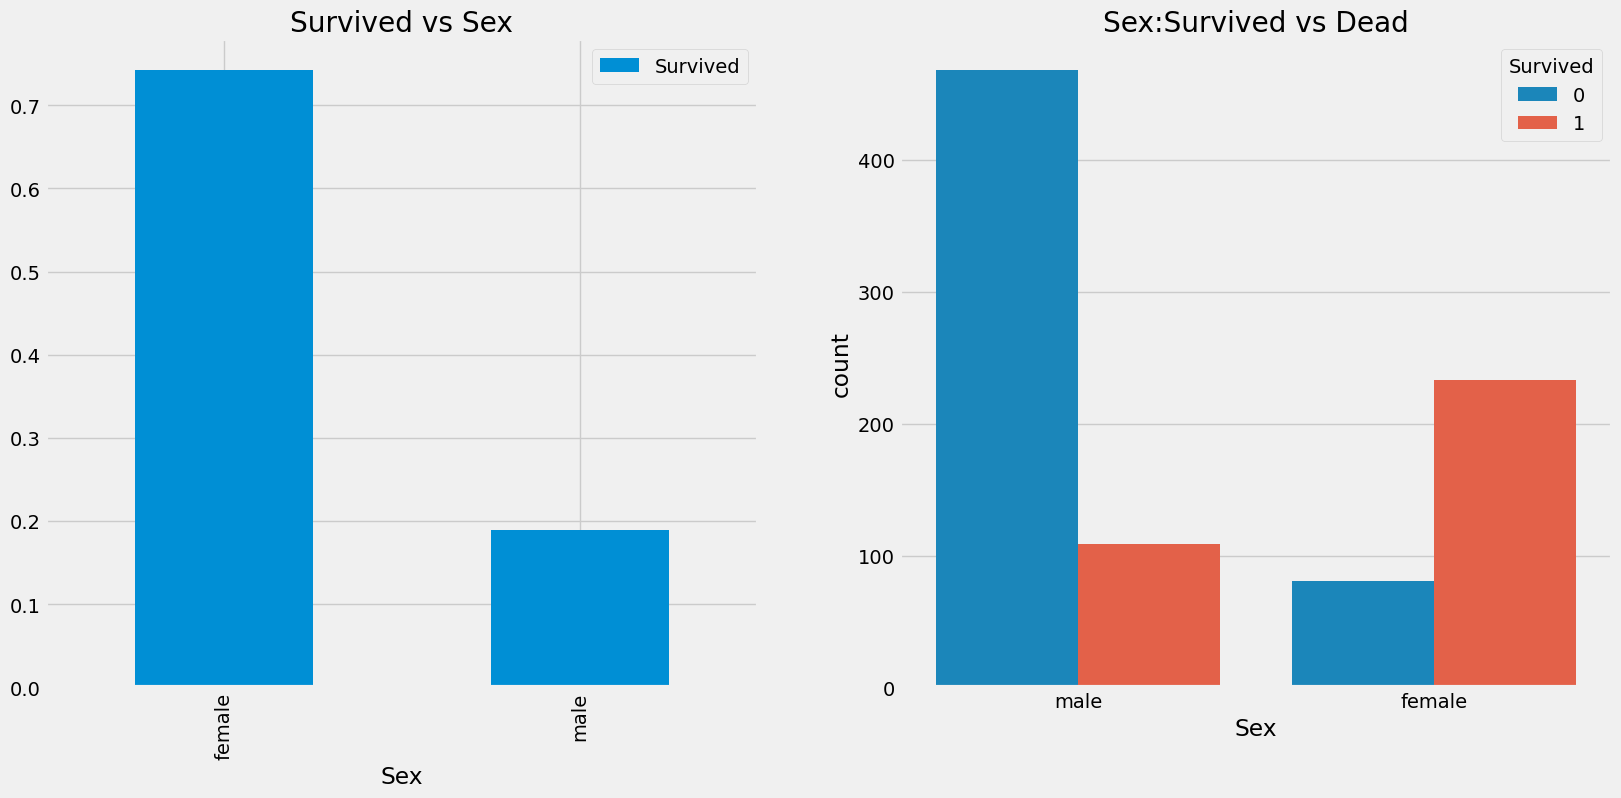

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## Pclass

In [12]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


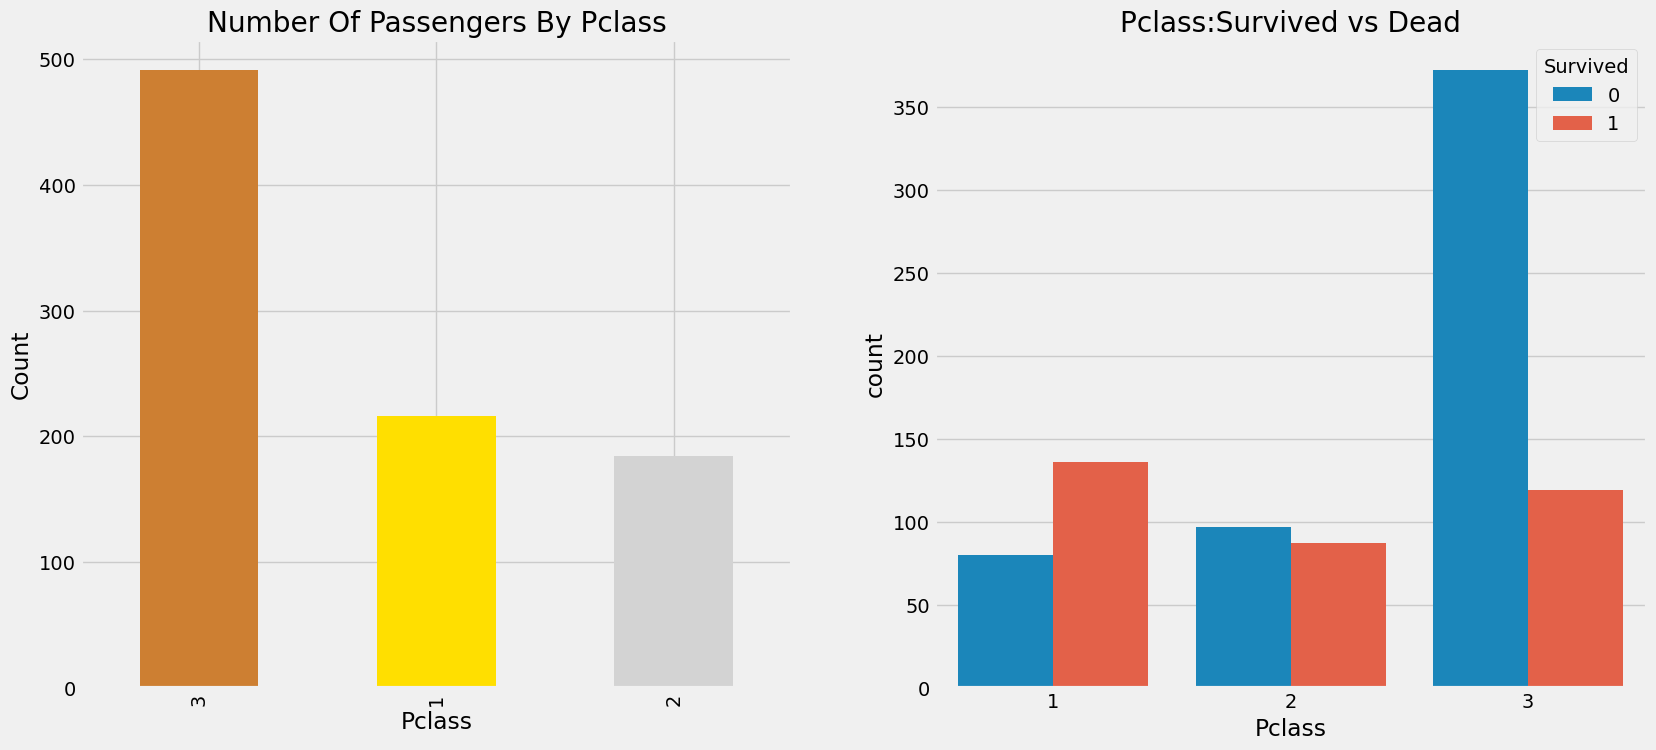

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

## Возраст

In [14]:
print('Самый пожилой пассажир:',data['Age'].max(),'лет')
print('Самы молодой пассажир::',data['Age'].min(),'лет')
print('Средний возраст на корабле:',data['Age'].mean(),'лет')

Самый пожилой пассажир: 80.0 лет
Самы молодой пассажир:: 0.42 лет
Средний возраст на корабле: 29.69911764705882 лет


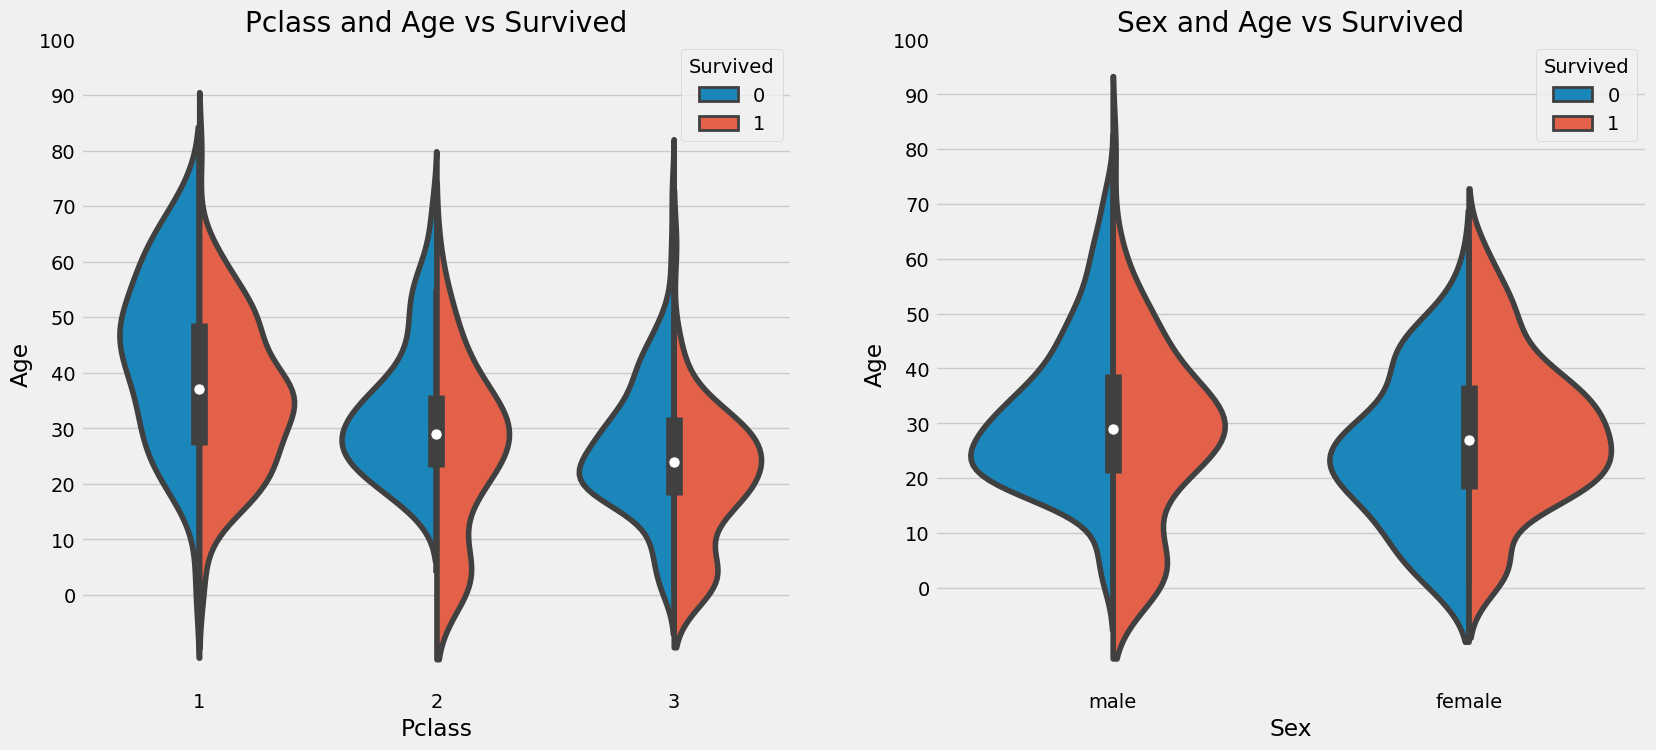

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## Часть2. Предсказательное моделирование

In [16]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [17]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [19]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [20]:
data['Embarked'].fillna('S',inplace=True)

In [21]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

In [22]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

In [23]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [24]:
data.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)

In [25]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## Модели машинного обучения

### Логистическая регрессия

In [26]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Точность логистической регрессии составляет ',metrics.accuracy_score(prediction3,test_Y))

Точность логистической регрессии составляет  0.8134328358208955


### Решающие деревья

In [27]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('Точность дерева решений составляет ',metrics.accuracy_score(prediction4,test_Y))

Точность дерева решений составляет  0.7985074626865671


### Метод k-ближайших соседей

In [28]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('Точность метода KNN составляет',metrics.accuracy_score(prediction5,test_Y))

Точность метода KNN составляет 0.8059701492537313
